# Basic Gradient Decent Optimizer

In [1]:
import numpy as np 
from sklearn.metrics import mean_squared_error

In [2]:
x = np.array([1,2,3,4])
y = np.array([10,12,20,25])

In [3]:
def gradient_descent(x,y):
    weight = 0.1
    bias = 0.1
    learning_rate = 0.05
    n = len(x)
    iteration = 100

    # Forward propagation
    for i in range(iteration):
        ypred = weight*x+bias
        mse = mean_squared_error(y,ypred)
    
    
    #Backward propagation
        dw = -(2/n)*sum(x*(y-ypred))
        db = -(2/n)*sum(y- ypred)
    
    #Update the weights and bias
    
        weight = weight-(learning_rate*dw)
        bias = bias -(learning_rate*db)
    
        print(f"{i} MSE: {mse}, Weight: {weight}, Bias: {bias}")

In [4]:
gradient_descent(x,y)

0 MSE: 304.33500000000004, Weight: 4.85, Bias: 1.74
1 MSE: 10.151350000000008, Weight: 5.6275, Bias: 2.0285
2 MSE: 2.135152874999998, Weight: 5.74975, Bias: 2.093775
3 MSE: 1.9072832506249988, Weight: 5.76399375, Bias: 2.12196
4 MSE: 1.8916610056429681, Weight: 5.7605084374999995, Bias: 2.1437655625
5 MSE: 1.8820949985420456, Weight: 5.75418571875, Bias: 2.1642618968750003
6 MSE: 1.8729654313654303, Weight: 5.74748095546875, Bias: 2.1842892775000005
7 MSE: 1.8641112904817663, Weight: 5.740797919492187, Bias: 2.203990110882813
8 MSE: 1.855520362583569, Weight: 5.734201952152343, Bias: 2.2233916199214847
9 MSE: 1.8471847166628241, Weight: 5.727702583057715, Bias: 2.2425019698912503
10 MSE: 1.8390967640466949, Weight: 5.721300153291616, Bias: 2.2613261271376963
11 MSE: 1.8312491444622006, Weight: 5.71499350653848, Bias: 2.2798684761010226
12 MSE: 1.8236347164254376, Weight: 5.708781257609364, Bias: 2.2981332518563002
13 MSE: 1.8162465506634193, Weight: 5.702662001438266, Bias: 2.316124612

# Artificial Neural Network

# Classification

In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf 
import pandas as pd 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv(r"C:\Users\HP\Downloads\classification.csv")
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [17]:
# Initialize Model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units=6, activation='relu'))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between layers
ann.compile(optimizer='adam', loss = 'binary_crossentropy')

# Fit the data
ann.fit(xtrain,ytrain, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5398
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4740
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4562
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4469
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4401
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4344
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4286
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4223
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4157
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4091
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4026
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3967
Epoch 13/50
250/250 [====

In [18]:
ypred = ann.predict(xtest)
ypred = ypred > 0.5
ypred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1585
           1       0.80      0.41      0.54       415

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



# Regression

In [20]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Regression.csv")
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130012,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720993,1001.451646,998.847605
998,403.315576,1000.771023,998.562851


In [21]:
import numpy as np 
sc = StandardScaler()

In [23]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
x = sc.fit_transform(x)

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [26]:
# Initialize Model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units=30, activation='linear'))
ann.add(Dense(units=20, activation='relu'))

# Add output layer
ann.add(Dense(units=1))

# Establish the connection between layers
ann.compile(optimizer='adam', loss = 'mse')

# Fit the data
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 14ms/step - loss: 255773.8438 - val_loss: 262378.6250
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 254980.8125 - val_loss: 261600.7812
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 254091.3125 - val_loss: 260647.5625
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 252927.3125 - val_loss: 259319.7812
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 251246.5469 - val_loss: 257370.9844
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 248784.7656 - val_loss: 254419.3438
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 245184.9062 - val_loss: 250068.4844
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 239951.0625 - val_loss: 244033.1406
Epoch 9/50
25/25 [==============================] - 0s 6ms/step - loss: 232972.5938 - val_loss: 235564.0156
Epoch 10/50
25/25 [========

<AxesSubplot:>

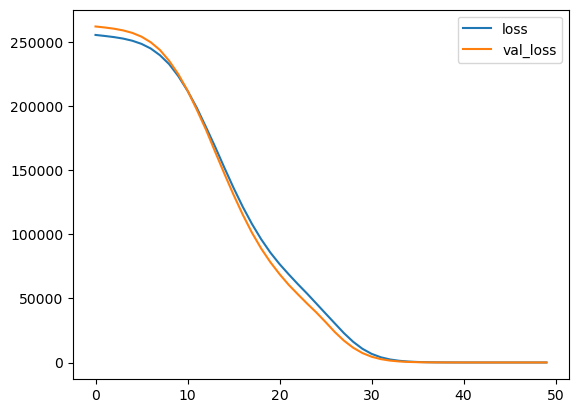

In [27]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [28]:
ypre = ann.predict(xtest)

7/7 [==============================] - 0s 3ms/step


In [30]:
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])